Question 3a

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [14]:
TRAINDATA_FNAME = 'mnist_traindata.hdf5'
TESTDATA_FNAME = 'mnist_testdata.hdf5' 
DETECT_CLASS = 2

# Read training data from file
f = h5py.File('mnist_traindata.hdf5', 'r')
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    xdata_train = data['xdata'][:]
    ydata_train = data['ydata'][:]

    target = (ydata_train.argmax(axis=1) == DETECT_CLASS)

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    xdata_test = data['xdata'][:]
    ydata_test = data['ydata'][:]

    target_t = (ydata_test.argmax(axis=1) == DETECT_CLASS)

In [15]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def log_predict_t(w, b, X):
    px = sigmoid(np.dot(X, w)+b)
    acc = np.sum((px >= 0.5) == target_t)/len(X)
    return acc

def log_train(w, b, x, target, reg_type, reg_coeff=0.01, itr=100):
    lr = 1
    costs = []
    dw = 0
    db = 0
    acc = []
    test_pred_acc = []
    reg_term = 0

    for i in range(itr):

        if reg_type == 'l1':
            reg_term = reg_coeff*np.sum(np.abs(w))

        if reg_type == 'l2':
            reg_term = reg_coeff*np.sum(np.abs(w))

        px = sigmoid(np.dot(x, w)+b)
        loss = -(np.sum(target*np.log(px)+(1-target)*np.log(1-px))) / len(x) + reg_term
        costs.append(loss)

        dz = px-target
        dw = np.dot(x.T, dz) / len(x) + reg_coeff * np.sign(w) if reg_type == 'l1' else np.dot(x.T, dz) / len(x) + 2 * reg_coeff * w
        db = np.sum(dz)/len(x)

        w = w - lr * dw
        b = b - lr * db

        acc.append(np.sum((px >= 0.5) == target)/len(x)*100)
        test_pred_acc.append(log_predict_t(w, b, xdata_test)*100)

    return acc, costs, w, b, test_pred_acc

def plot(train_costs, train_acc, test_acc, test_costs):

    plt.plot(list(range(len(train_costs))), train_costs, label = 'Train',color='blue')
    plt.plot(list(range(len(test_costs))), test_costs, label = 'Test', color='orange')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()

    plt.plot(list(range(len(train_acc))), train_acc, label = 'Train', color='blue')
    plt.plot(list(range(len(test_acc))), test_acc, label = 'Test', color='orange')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.show()


The Plots for l1 regularization


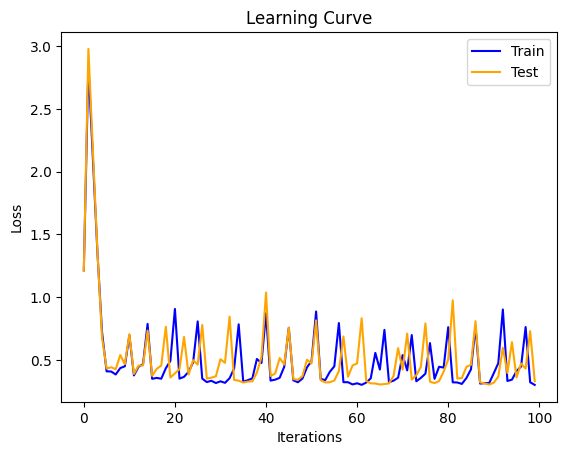

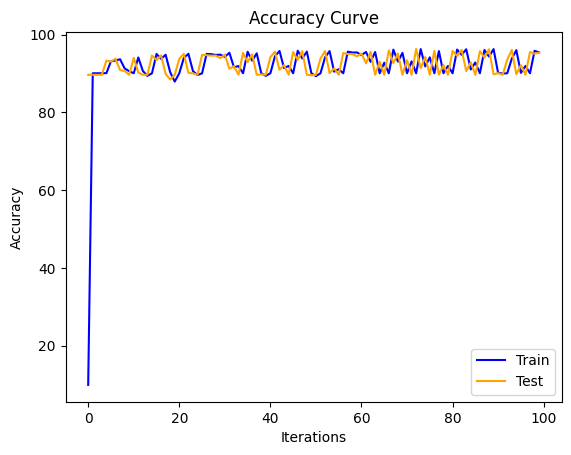

Training Accuracy with l1 regularization = 96.285%
Test Accuracy with l1 regularization =  96.33%
Final cost of training data = 0.30084030405897266
Final cost of test data = 0.303783775353101


In [16]:
w0 = np.zeros(xdata_train.shape[1])
b0 = 1

train_acc, train_costs, w_opt, b_opt, test_acc = log_train(w0, b0, xdata_train, target, 'l1')
test_acc_t, test_costs, w_opt_t, b_opt_t, test_acc_tt = log_train(w0, b0, xdata_test, target_t, 'l1')
print("The Plots for l1 regularization")
plot(train_costs, train_acc, test_acc, test_costs)

print("Training Accuracy with l1 regularization = " + str(max(train_acc)) + "%")
print("Test Accuracy with l1 regularization =  " + str(max(test_acc)) + "%")
print("Final cost of training data = " + str(min(train_costs)))
print("Final cost of test data = " + str(min(test_costs)))

The Plots for l1 regularization


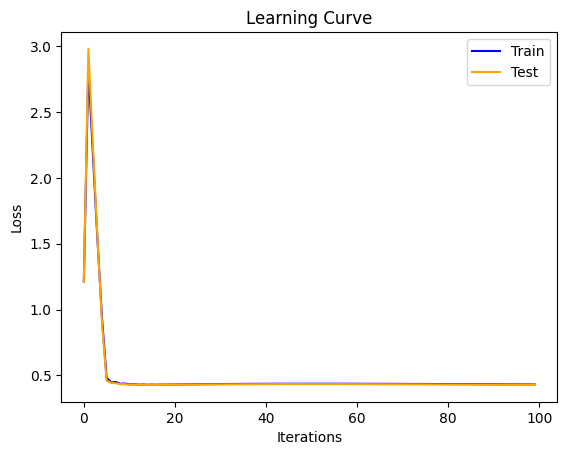

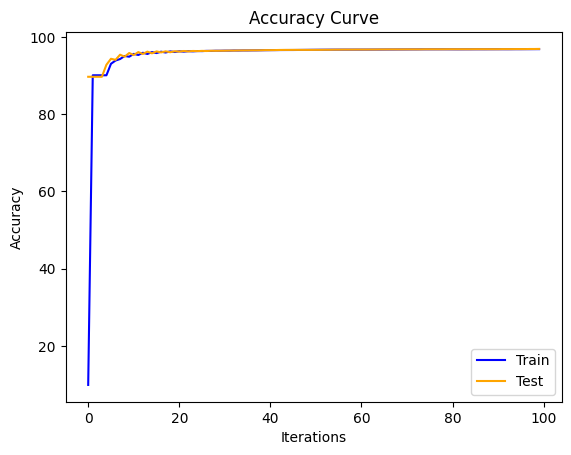

Training Accuracy with l2 regularization = 96.83500000000001%
Test Accuracy with l2 regularization =  96.89%
Final cost of training data = 0.4287386723670089
Final cost of test data = 0.42736873249078317


In [17]:
train_acc, train_costs, w_opt, b_opt, test_acc = log_train(w0, b0, xdata_train, target, 'l2')
test_acc_t, test_costs, w_opt_t, b_opt_t, test_acc_tt = log_train(w0, b0, xdata_test, target_t, 'l2')
print("The Plots for l1 regularization")
plot(train_costs, train_acc, test_acc, test_costs)

print("Training Accuracy with l2 regularization = " + str(max(train_acc)) + "%")
print("Test Accuracy with l2 regularization =  " + str(max(test_acc)) + "%")
print("Final cost of training data = " + str(min(train_costs)))
print("Final cost of test data = " + str(min(test_costs)))

In [18]:
with h5py.File('data3a1.hd5','w') as hf:
    hf.create_dataset('w', data = np.asarray(w_opt))
    hf.create_dataset('b', data = np.asarray(b_opt))

i) The learning rate is a hyperparameter that determines the step size at which the model parameters are updated during each iteration of the training process. The smaller the learning rate, the smaller is the step size in changing the weights and require more number iterations to find the optimaal weihgts and vice-versa. Differet learning rates were tried like, 1, 0.1, 0.001, 0.0001, 0.0005, 0.008, 0.04, etc. It is observed that a higher learning rate resulted in a better accuracy as the amount of data required to update the weights are large in volume. Learning Rate = 1 was choosen as the optimal learning rate

ii) Loss of each epoch was calculated along with the accuracy and appended it to repective lists. A thetreshold condition of 0.5 is used for determining accuracy. The weight update was run for certain number of iterations with a limit to mmaximum number of iterations. And later the minimum value of loss function and its corresponding weight was chosen as optimal wrights.

iii) Both L1 and L2 regularization can help to prevent overfitting by adding a penalty to the loss function. L2 regularization is generally more effective at reducing overfitting in logistic regression models, especially when there are many correlated features. As we can see in this example the L2 regularization has better performance with a regularizatioon coefficient of 0.01as L2 regularization is generally more effective at reducing overfitting in logistic regression models, especially when there are many correlated features.